In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_quality = pd.read_csv("air_quality.csv")
electric_vehicle = pd.read_csv("electric_vehicle.csv")
air_quality = air_quality.drop(labels=['Status', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)

In [4]:
df_world = electric_vehicle[(electric_vehicle['region'] == 'World') & (electric_vehicle.parameter == 'EV sales')]

In [5]:
df_world.powertrain.unique()
df_phev = df_world[df_world.powertrain == 'PHEV']
df_bev = df_world[df_world.powertrain == 'BEV']
df_fcev = df_world[df_world.powertrain == 'FCEV']

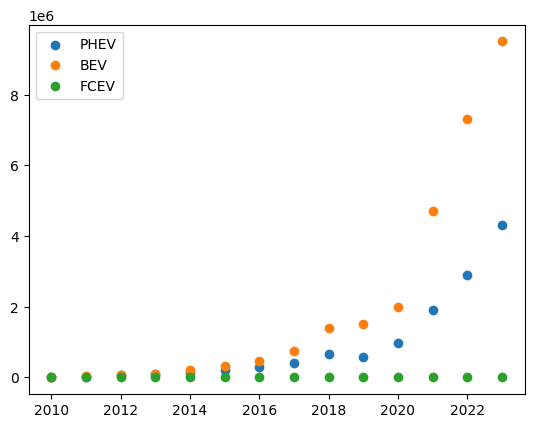

In [6]:
plt.scatter(df_phev.year, df_phev.value)
plt.scatter(df_bev.year, df_bev.value)
plt.scatter(df_fcev.year, df_fcev.value)
plt.legend(['PHEV', 'BEV', 'FCEV'])

In [7]:
electric_vehicle.head(5)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
df_ev = electric_vehicle[(electric_vehicle.parameter == 'EV sales')]

In [17]:
ev_group = df_ev[['region', 'value']].groupby('region').agg("sum").sort_values(by='value')

In [31]:
ev_group[ev_group.value < 10000].index

Index(['Seychelles', 'Cyprus', 'South Africa', 'Chile', 'Estonia', 'Bulgaria',
       'Latvia', 'Lithuania', 'Croatia', 'Costa Rica'],
      dtype='object', name='region')

In [32]:
delete_group = ['Seychelles', 'Cyprus', 'South Africa', 'Chile', 'Estonia', 'Bulgaria', 'Latvia', 'Lithuania', 'Croatia', 'Costa Rica']

In [52]:
new_electric = electric_vehicle[~electric_vehicle['region'].isin(delete_group)]
new_electric

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,2.800000e+07
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9.500000e+06
3795,World,Historical,EV stock,Cars,FCEV,2023,Vehicles,6.600000e+04
3796,World,Historical,EV sales,Cars,PHEV,2023,Vehicles,4.300000e+06


In [54]:
new_electric.to_csv("cleaned_ev.csv")